## WOrd embeddings with keras
![word embeddings](images/embed.jpg)

In [0]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


## Code for generating one hot vectors for given data

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}

# indexing each word in the list of sentences in `samples`
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

# maximum sentence length to be considered
max_length = 10

#creating a 3d array of zeros of dimensions(len(samples),max_length,max(token_index.values()) + 1)
results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))
results.shape


(2, 10, 11)

In [0]:
# generating one hot encodings for `samples`
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

## Using keras tokeniser to generate one hot vectors 

In [1]:
# keras tokenizer for tokenizing text and make one hot encoding 
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
# fit data to get tokens
tokenizer.fit_on_texts(samples)
# convert words to sequence of numbers
sequences = tokenizer.texts_to_sequences(samples)
sequences

Using TensorFlow backend.


[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [2]:
# generate one hot vector matrix
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
one_hot_results.shape

Found 9 unique tokens.


(2, 1000)

## Word embeddings using keras

- In this kernel we learn how to use keras along with embedding layer
- Embedding layer is used for loading or generation word embeddings for text data in deep learning models

In [3]:
# Download IMDB reviews text dataset
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf ./aclImdb_v1.tar.gz
!ls aclImdb/

--2020-01-22 13:53:34--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.1MB/s    in 4.4s    

2020-01-22 13:53:39 (18.1 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

imdbEr.txt  imdb.vocab	README	test  train


In [4]:
!ls ./aclImdb/train

labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt


In [0]:
import os
imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
# collecting the reviews and labels form dataset into python lists
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [6]:
#list of data and labels collected in previous cell
print("labels : ",labels[:5])
print("texts : ", texts[:5])

labels :  [0, 0, 0, 0, 0]
texts :  ['I rented this horrible movie. The worst think I have ever seen. I believe a 1st grade class could have done a better job. The worse film I have ever seen and I have seen some bad ones. Nothing scary except I paid 1.50 to rent it and that was 1.49 too much. The acting is horrible, the characters are worse and the film is just a piece of trash. The slauther house scenes are so low budget that it makes a B movied look like an Oscar candidate. All I can say is if you wnat to waste a good evening and a little money go rent this horrible flick. I would rather watch killer clowns from outer space while sitting in a bucket of razors than sit through this flop again', 'Sorry, gave it a 1, which is the rating I give to movies on which I walk out or fall asleep. In this case I fell asleep 10 minutes from the end, really, really bored and not caring at all about what happened next.', 'Never saw the original movie in the series...I only hope it was a much better

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
# maximum number of words allowed in a single review
maxlen = 100
# Number of taining samples
training_samples = 8000
# number of validation samples
validation_samples = 10000
# number of words considered for vocabulary
max_words = 10000
#tokenises the dataset into numbers
tokenizer = Tokenizer(num_words=max_words)
# running the tokeniser
tokenizer.fit_on_texts(texts)
# converting the existing text to their respective token numbers
sequences = tokenizer.texts_to_sequences(texts)

In [8]:
# dictionary of word and corresponding index
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# pad the sequence of tokenised sentenses 
# (if length is greater then maxlen the sentence is clipped and if the sentence is less then the maxlen sentence is padded)
data = pad_sequences(sequences, maxlen=maxlen)
# converting list of labelled sentences to numpy arrays
# Note : we cannot do this earlier because length of each sentence is different
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
# get the indices of data for shuffling
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
# shuffling data based on shuffled indices
data = data[indices]
# shuffling labes based on shuffled indices
labels = labels[indices]
# splitting train and validation data
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


## download and extract glove word embeddings

In [9]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-01-22 13:54:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-22 13:54:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-22 13:54:04--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [10]:
glove_dir = './'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
# extacting word embeddings for a file where
# each line consists of space seperated values where first value is word and rest are numbers of vector
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


## In this cell we are filtering the words which are in our vocabulary from glove embedding 
> NOTE : this reduces total number of parameters in final model

In [0]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  # check the word in dataset with word in embeddings and collect the word vector else skip
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

## Lets plot movie review words from reduced embeddings


In [0]:
# words which are considered to plot
tagged_review_words = []
# words for which i am going to display tags
display_review_words = []
tagged_text = ["" for i in range(1000)]
# collecting words
for key,val in word_index.items():
  if val >= 60 and val < 110:
    tagged_review_words.append(val)
    tagged_text[val] = key 
  if val < 1000 :
    display_review_words.append(val)


reducing dimentionality of vectors to 2 so that we can scatter plot them

In [0]:
# reduce dimnetionality
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix[:1000])

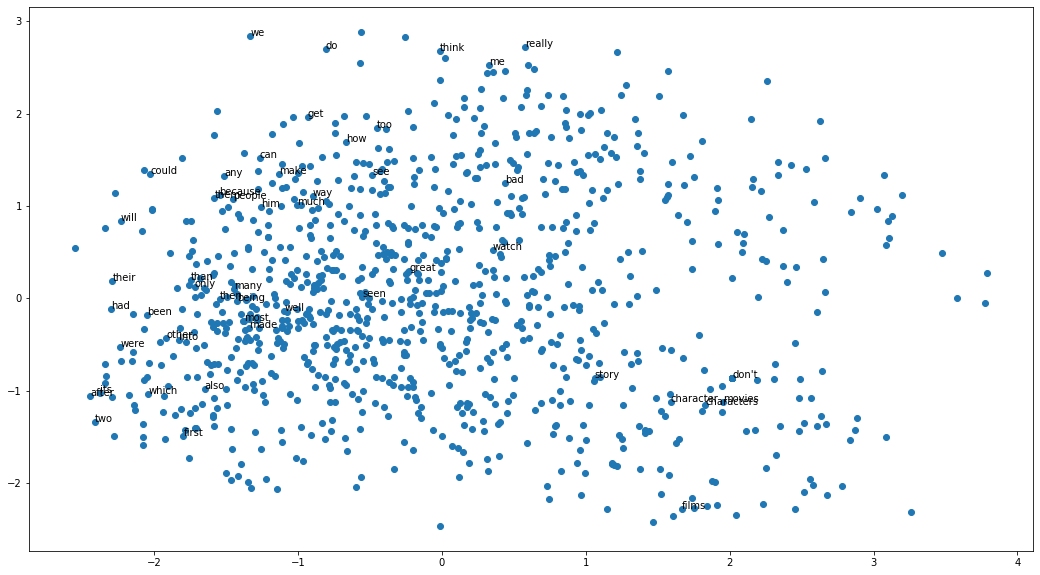

In [59]:
# plotting scattered vectors from movie review words along with some tags
fig, ax = plt.subplots(figsize=(18, 10))
ax.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1])

for i, txt in enumerate(tagged_text):
    ax.annotate(txt, (reduced_embeddings[:,0][i], reduced_embeddings[:,1][i]))





In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
# initialise a sequential model
model = Sequential()
# add embedding layer
model.add(Embedding(max_words,  embedding_dim, input_length=maxlen, name = "embedding") )
# convert the 3-D(batch_size, maxlen, embedding_dim) tensor into 2-D (batch_size, maxlen * embedding_dim) tensor with platten
model.add(Flatten(name = "flatten"))
model.add(Dense(32, activation='relu', name = "dense-1"))
model.add(Dense(1, activation='sigmoid', name = "dense-2"))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense-1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense-2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


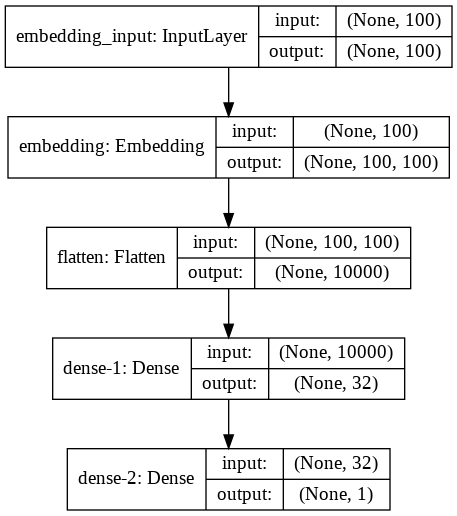

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# add weight of the Glove word embeddings to the embedding layer
model.layers[0].set_weights([embedding_matrix])
# set the layer as a non-trainable layer
model.layers[0].trainable = False

In [0]:
# compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
# fit the model and collect the parameters during training
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))
# save weights of the trained model
model.save_weights('pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 3s 326us/step - loss: 0.6943 - acc: 0.6035 - val_loss: 0.6596 - val_acc: 0.6007
Epoch 2/10
8000/8000 [==============================] - 2s 273us/step - loss: 0.5502 - acc: 0.7214 - val_loss: 0.6607 - val_acc: 0.6294
Epoch 3/10
8000/8000 [==============================] - 2s 276us/step - loss: 0.4644 - acc: 0.7815 - val_loss: 0.5980 - val_acc: 0.6867
Epoch 4/10
8000/8000 [==============================] - 2s 275us/step - loss: 0.4048 - acc: 0.8152 - val_loss: 0.7209 - val_acc: 0.6461
Epoch 5/10
8000/8000 [==============================] - 2s 274us/step - loss: 0.3429 - acc: 0.8498 - val_loss: 0.8033 - val_acc: 0.6489
Epoch 6/10
8000/8000 [==============================] - 2s 275us/step - loss: 0.3048 - acc: 0.8686 - val_loss: 0.6748 - val_acc: 0.6907
Epoch 7/10
8000/8000 [==============================] - 2s 271us/step - loss: 0.2669 - acc: 0.8930 - val_loss: 0.7256 - val_acc: 0.7004

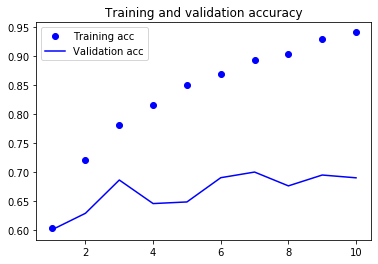

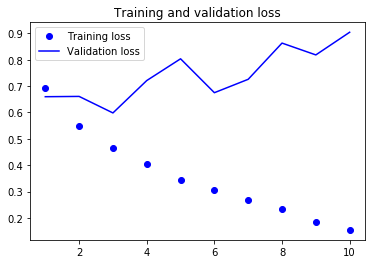

In [0]:
import matplotlib.pyplot as plt
# save the parameters from the models history into variables for plotting graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
# It is obvious that number of times that accuracy is saved are equal to number of epocs
epochs = range(1, len(acc) + 1)
# plot training and validatoin accuracy in a single graph 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
# plot training and validation loss in a single graph
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()